In [84]:
import librosa
import numpy as np
from os.path import isfile,join
from os import listdir
from scipy import signal as sg
from scipy.signal import butter,lfilter,freqz
import matplotlib.pyplot as plt
from scipy import hamming
import soundfile as sf
import scipy
import numpy
from scipy.fftpack import dct
from python_speech_features import mfcc
from python_speech_features import logfbank
from scipy.fftpack import fft
from scipy.io import wavfile
import soundfile as sf
import math
import tensorflow
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import model_from_yaml
from keras.models import model_from_json
from keras.layers import Dense

from keras import backend
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardbScaler


In [85]:
babycry=[f for f in listdir('/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry') if isfile(join('/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry', f))]

#/Users/pkesh/projects/Exp-Research-POC/input_data/902 - Noise
nonbabycry=[f for f in listdir('/Users/pkesh/projects/Exp-Research-POC/input_data/902 - Noise') if isfile(join('/Users/pkesh/projects/Exp-Research-POC/input_data/902 - Noise', f))]
#nonbabycry=[f for f in listdir('/Users/pkesh/projects/Exp-Research-POC/input_data/non-baby-cry') if isfile(join('/Users/pkesh/projects/Exp-Research-POC/input_data/non-baby-cry', f))]
babysilence=[f for f in listdir('/Users/pkesh/projects/Exp-Research-POC/input_data/baby_silence') if isfile(join('/Users/pkesh/projects/Exp-Research-POC/input_data/baby_silence', f))]
babylaugh=[f for f in listdir('/Users/pkesh/projects/Exp-Research-POC/input_data/baby_laugh') if isfile(join('/Users/pkesh/projects/Exp-Research-POC/input_data/baby_laugh',f))]

In [86]:
baby_cry=[]
for each in range(0,len(babycry)) :
    cry='/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry' + '/' + babycry[each] 
    baby_cry.append(cry)

In [87]:
len(baby_cry)

571

In [88]:
baby_cry

['/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/8c66887c-8251-49fa-903b-c02d56405f58-1436856065644-1.7-m-26-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/0f257dac-7d6f-4575-9192-e3b4dcd3d4ef-1430185441581-1.7-f-26-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/2602b7c2-e96d-42f6-9767-f1ae74925ef8-1431376228657-1.7-f-22-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/81724071-bc5e-4e38-8f35-85a691af5721-1430737552979-1.7-m-04-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/9CFD61B9-BF13-406D-8B2F-F73CFAAF25CB-1430927728-1.0-f-04-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/adcefe56-90b1-4120-83b1-93008cb6f7f0-1430731683554-1.7-m-04-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/afa44e7f-4187-4f1c-9437-b49ba75f

In [89]:
non_babycry=[]
for each in range(0,len(nonbabycry)) :
    x='/Users/pkesh/projects/Exp-Research-POC/input_data/902 - Noise' + '/' + nonbabycry[each] 
    non_babycry.append(x)

In [90]:
len(non_babycry)

100

In [92]:
baby_silence=[]
for each in range(0,len(babysilence)) :
    silence='/Users/pkesh/projects/Exp-Research-POC/input_data/baby_silence' + '/' + babysilence[each] 
    baby_silence.append(silence)

In [93]:
baby_laugh=[]
for each in range(0,len(babylaugh)) :
    laugh='/Users/pkesh/projects/Exp-Research-POC/input_data/baby_laugh' + '/' + babylaugh[each] 
    baby_laugh.append(laugh)

In [94]:
nonbaby_cry=baby_silence+baby_laugh+non_babycry

In [95]:
len(nonbaby_cry)

300

In [97]:
def Mfcc(audiofile):
    s,r=sf.read(audiofile)
    
    x=np.array_split(s,64)
    
    logg=np.zeros((64,12))
    for i in range(len(x)):
        
        m=np.mean(mfcc(x[i],r, numcep=12,nfft=2048),axis=0)
        logg[i,:]=m

    return logg

In [98]:
r=Mfcc(baby_cry[10])

In [99]:
np.shape(r)

(64, 12)

In [100]:
r

array([[-5.87583974e+00, -7.52111807e-01, -5.58647485e+00,
        -1.29709250e+01, -1.87701462e+01, -1.86511172e+01,
        -1.65913240e+01,  3.12780174e+00,  6.81465534e+00,
         4.33316672e-01, -3.26366674e+00,  3.56098312e-01],
       [-6.24634039e+00, -5.94552189e+00, -1.32969774e+00,
        -1.55391876e+01, -1.12639019e+01, -2.42359262e+01,
        -9.83518489e+00, -8.79547162e+00, -9.45490957e+00,
        -7.67445605e+00, -3.37528465e+00,  9.09662546e-01],
       [-4.90280814e+00, -5.50397873e-01,  1.08743634e+00,
        -2.84908211e+01, -2.62336452e+01, -1.74602540e+01,
         4.46977872e+00,  1.21120943e+01,  1.98086453e+00,
         3.81765962e+00, -6.74265126e+00,  1.38774367e+00],
       [-4.54690737e+00, -3.62247210e+00,  9.91067693e+00,
        -2.85310982e+01, -2.28237310e+01, -2.09262353e+01,
        -8.56366808e+00,  6.12415132e+00,  2.08496450e+01,
         1.06181026e+01,  7.69006377e+00, -6.13396044e+00],
       [-6.69486170e+00, -9.34134900e+00, -9.1788939

In [101]:
data=np.zeros((len(nonbaby_cry) + len(baby_cry),64,12))
output=[]
for i in range(0,len(baby_cry)):
       r=Mfcc(baby_cry[i])
       
       data[i,:,:]=r
       output.append(1) 
        
all=baby_cry+nonbaby_cry
for i in range(len(baby_cry)-1,len(all)-1):
 
       r=Mfcc(all[i])
       
       data[i,:,:]=r
       output.append(0)  

In [103]:
len(data)

871

In [151]:
input=data

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(input, output, test_size=0.3, random_state=None,stratify = output)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None,stratify = y_temp)

In [153]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)
print('Length of y_train:',len(y_train))

Shape of X_train: (609, 64, 12)
Shape of X_val: (131, 64, 12)
Shape of X_test: (131, 64, 12)
Length of y_train: 609


In [154]:
#ANN

In [155]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)


In [156]:
input_shape = X_train.shape[1]
model.add(Dense(100, input_shape=(input_shape, )))


In [157]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

# Define the simplified ANN model
input_shape = X_train.shape[1]
num_labels = y_train.shape[1]

model = Sequential()
model.add(Dense(10, input_shape=(input_shape, )))
model.add(Activation('linear'))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 10
num_batch_size = 128

checkpointer = ModelCheckpoint(filepath='ann_reduced.hdf5', verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                7690      
                                                                 
 activation_51 (Activation)  (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 2)                 22        
                                                                 
 activation_52 (Activation)  (None, 2)                 0         
                                                                 
Total params: 7,712
Trainable params: 7,712
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/5 [=====>........................] - ETA: 0s - loss: 27.3609 - accuracy: 0.2734
Epoch 1: val_loss improved from inf to 12.05257, saving model to ann_reduced.hdf5
5/5 [===

In [107]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D,Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras import optimizers, callbacks
import numpy as np
from keras.layers import Dense,Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array

In [108]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization

model1 = Sequential()
model1.add(Conv1D(64, 2, activation='relu', input_shape=(64, 12))) 
model1.add(Conv1D(40,2,padding='valid', activation='relu',strides=1)) 
model1.add(Dropout(0.2))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(40))
model1.add(Dropout(0.2))
model1.add(Activation('relu'))
model1.add(BatchNormalization(epsilon=0.001, momentum=0.9, weights=None))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [24]:
from keras.optimizers import Adam
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_val)
validation_y = np.asarray(y_val)
history = model1.fit(train_x, train_y, epochs=100, validation_data=(validation_x,validation_y),batch_size=10, shuffle=False,verbose=2)

Epoch 1/100
61/61 - 1s - loss: 0.4195 - accuracy: 0.8161 - val_loss: 0.1585 - val_accuracy: 0.9771 - 1s/epoch - 18ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1973 - accuracy: 0.9310 - val_loss: 0.1147 - val_accuracy: 0.9847 - 196ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1695 - accuracy: 0.9360 - val_loss: 0.1165 - val_accuracy: 0.9695 - 200ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.1229 - accuracy: 0.9639 - val_loss: 0.0919 - val_accuracy: 0.9695 - 196ms/epoch - 3ms/step
Epoch 5/100
61/61 - 0s - loss: 0.1023 - accuracy: 0.9639 - val_loss: 0.0948 - val_accuracy: 0.9618 - 189ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0904 - accuracy: 0.9721 - val_loss: 0.0954 - val_accuracy: 0.9695 - 181ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0903 - val_accuracy: 0.9695 - 179ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0667 - accuracy: 0.9819 - val_loss: 0.1092 - val_accuracy: 0.9695 - 187ms/epoch - 3ms/step
Epoch 9/10

Epoch 67/100
61/61 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 0.9695 - 198ms/epoch - 3ms/step
Epoch 68/100
61/61 - 0s - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.1350 - val_accuracy: 0.9771 - 184ms/epoch - 3ms/step
Epoch 69/100
61/61 - 0s - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.1327 - val_accuracy: 0.9771 - 192ms/epoch - 3ms/step
Epoch 70/100
61/61 - 0s - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.1282 - val_accuracy: 0.9771 - 204ms/epoch - 3ms/step
Epoch 71/100
61/61 - 0s - loss: 0.0118 - accuracy: 0.9984 - val_loss: 0.1423 - val_accuracy: 0.9695 - 205ms/epoch - 3ms/step
Epoch 72/100
61/61 - 0s - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.1230 - val_accuracy: 0.9695 - 182ms/epoch - 3ms/step
Epoch 73/100
61/61 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1268 - val_accuracy: 0.9771 - 194ms/epoch - 3ms/step
Epoch 74/100
61/61 - 0s - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.1280 - val_accuracy: 0.9695 - 184ms/epoch - 3ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


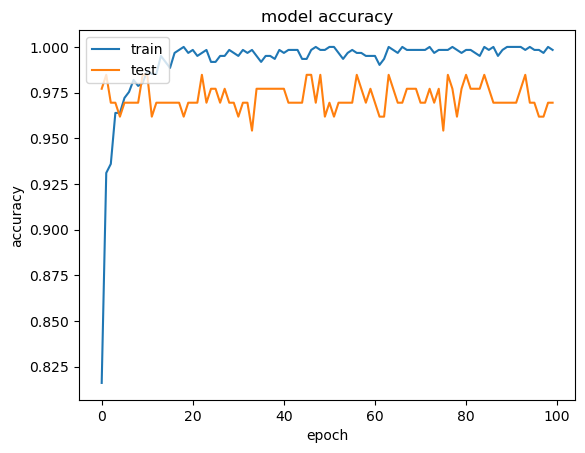

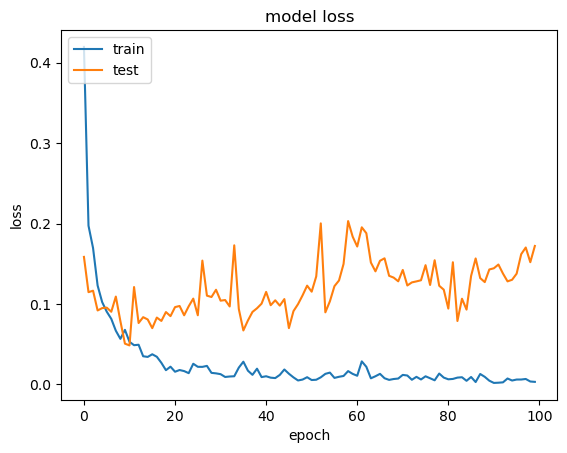

In [26]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model1.evaluate(validation_x,validation_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9695


[0.17208975553512573, 0.9694656729698181]

In [69]:
test_x = np.asarray(X_test)
test_y = np.asarray(y_test)
model1.evaluate(test_x,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9771


[0.056437961757183075, 0.9770992398262024]

In [29]:
model2 = Sequential()

model2.add(Conv1D(10, 2, activation='relu', input_shape=(64,12)))
model2.add(Conv1D(6,2,padding='valid', activation='relu',strides=1))
model2.add(Dropout(0.2))
model2.add(BatchNormalization(epsilon=0.001, momentum=0.9, weights=None))

model2.add(GlobalMaxPooling1D())
model2.add(Dropout(0.2))
model2.add(Dense(40))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(BatchNormalization(epsilon=0.001, momentum=0.9, weights=None))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [30]:
from keras.optimizers import Adam
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history = model2.fit(train_x, train_y, epochs=100, validation_data=(validation_x,validation_y),batch_size=10, shuffle=False,verbose=2)

Epoch 1/100
61/61 - 1s - loss: 0.6171 - accuracy: 0.6765 - val_loss: 0.4753 - val_accuracy: 0.9084 - 920ms/epoch - 15ms/step
Epoch 2/100
61/61 - 0s - loss: 0.4556 - accuracy: 0.7997 - val_loss: 0.3585 - val_accuracy: 0.9237 - 151ms/epoch - 2ms/step
Epoch 3/100
61/61 - 0s - loss: 0.3920 - accuracy: 0.8358 - val_loss: 0.2903 - val_accuracy: 0.9313 - 162ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.3676 - accuracy: 0.8506 - val_loss: 0.2368 - val_accuracy: 0.9389 - 158ms/epoch - 3ms/step
Epoch 5/100
61/61 - 0s - loss: 0.3479 - accuracy: 0.8670 - val_loss: 0.2505 - val_accuracy: 0.9313 - 142ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.3454 - accuracy: 0.8703 - val_loss: 0.2270 - val_accuracy: 0.9618 - 156ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.2957 - accuracy: 0.8801 - val_loss: 0.1764 - val_accuracy: 0.9618 - 167ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.2797 - accuracy: 0.8949 - val_loss: 0.1722 - val_accuracy: 0.9695 - 154ms/epoch - 3ms/step
Epoch 9

Epoch 67/100
61/61 - 0s - loss: 0.0796 - accuracy: 0.9688 - val_loss: 0.1258 - val_accuracy: 0.9542 - 151ms/epoch - 2ms/step
Epoch 68/100
61/61 - 0s - loss: 0.1057 - accuracy: 0.9524 - val_loss: 0.1193 - val_accuracy: 0.9695 - 151ms/epoch - 2ms/step
Epoch 69/100
61/61 - 0s - loss: 0.0954 - accuracy: 0.9721 - val_loss: 0.1481 - val_accuracy: 0.9618 - 150ms/epoch - 2ms/step
Epoch 70/100
61/61 - 0s - loss: 0.1006 - accuracy: 0.9704 - val_loss: 0.1301 - val_accuracy: 0.9618 - 152ms/epoch - 2ms/step
Epoch 71/100
61/61 - 0s - loss: 0.0882 - accuracy: 0.9639 - val_loss: 0.1146 - val_accuracy: 0.9695 - 147ms/epoch - 2ms/step
Epoch 72/100
61/61 - 0s - loss: 0.0929 - accuracy: 0.9672 - val_loss: 0.1097 - val_accuracy: 0.9695 - 155ms/epoch - 3ms/step
Epoch 73/100
61/61 - 0s - loss: 0.0683 - accuracy: 0.9737 - val_loss: 0.1207 - val_accuracy: 0.9618 - 149ms/epoch - 2ms/step
Epoch 74/100
61/61 - 0s - loss: 0.0821 - accuracy: 0.9688 - val_loss: 0.1263 - val_accuracy: 0.9618 - 151ms/epoch - 2ms/step


In [32]:
model2.evaluate(validation_x,validation_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9542


[0.16867801547050476, 0.9541984796524048]

In [33]:
model2.evaluate(test_x,test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9542


[0.09742449223995209, 0.9541984796524048]

In [34]:
model2.evaluate(train_x,train_y)

20/20 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9901


[0.0287565216422081, 0.9901477694511414]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


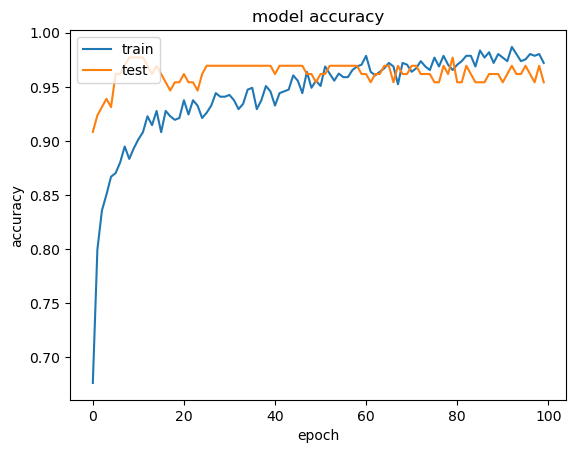

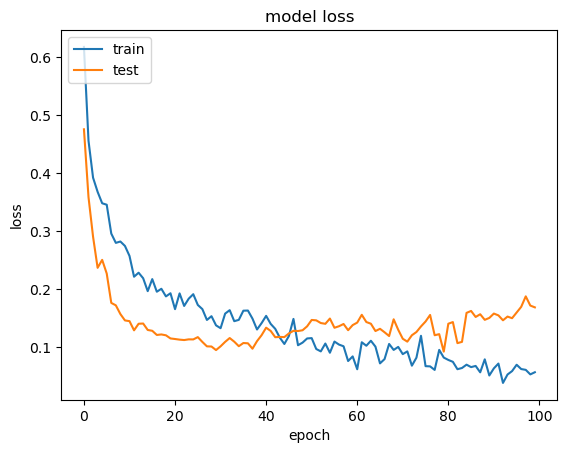

In [35]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
model3 = Sequential()
model3.add(Conv1D(64, 2, input_shape=(64, 12)))
model3.add(Activation('relu'))
model3.add(Conv1D(64, 2))
model3.add(Activation('relu'))
model3.add(MaxPooling1D())
model3.add(Conv1D(128, 2))
model3.add(Activation('relu'))
model3.add(Conv1D(128, 2))
model3.add(Activation('relu'))
model3.add(GlobalAveragePooling1D())
model3.add(Dropout(0.5))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

In [37]:
from keras.optimizers import Adam
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
history = model3.fit(train_x, train_y, epochs=100, validation_data=(validation_x,validation_y),batch_size=10, shuffle=False,verbose=2)

Epoch 1/100
61/61 - 1s - loss: 0.3275 - accuracy: 0.8670 - val_loss: 0.1397 - val_accuracy: 0.9160 - 954ms/epoch - 16ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1099 - accuracy: 0.9540 - val_loss: 0.1019 - val_accuracy: 0.9771 - 338ms/epoch - 6ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0738 - accuracy: 0.9704 - val_loss: 0.1031 - val_accuracy: 0.9924 - 333ms/epoch - 5ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.1486 - val_accuracy: 0.9771 - 356ms/epoch - 6ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.2188 - val_accuracy: 0.9695 - 330ms/epoch - 5ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0285 - accuracy: 0.9885 - val_loss: 0.2672 - val_accuracy: 0.9618 - 346ms/epoch - 6ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0121 - accuracy: 0.9951 - val_loss: 0.3022 - val_accuracy: 0.9771 - 350ms/epoch - 6ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.3153 - val_accuracy: 0.9695 - 395ms/epoch - 6ms/step
Epoch 9

Epoch 66/100
61/61 - 1s - loss: 8.8323e-05 - accuracy: 1.0000 - val_loss: 0.4792 - val_accuracy: 0.9847 - 691ms/epoch - 11ms/step
Epoch 67/100
61/61 - 1s - loss: 1.2292e-05 - accuracy: 1.0000 - val_loss: 0.4863 - val_accuracy: 0.9847 - 557ms/epoch - 9ms/step
Epoch 68/100
61/61 - 1s - loss: 7.8588e-05 - accuracy: 1.0000 - val_loss: 0.4887 - val_accuracy: 0.9847 - 638ms/epoch - 10ms/step
Epoch 69/100
61/61 - 1s - loss: 2.2763e-05 - accuracy: 1.0000 - val_loss: 0.4942 - val_accuracy: 0.9847 - 630ms/epoch - 10ms/step
Epoch 70/100
61/61 - 1s - loss: 1.4708e-05 - accuracy: 1.0000 - val_loss: 0.4960 - val_accuracy: 0.9847 - 577ms/epoch - 9ms/step
Epoch 71/100
61/61 - 1s - loss: 6.5402e-05 - accuracy: 1.0000 - val_loss: 0.5038 - val_accuracy: 0.9847 - 551ms/epoch - 9ms/step
Epoch 72/100
61/61 - 1s - loss: 7.5310e-05 - accuracy: 1.0000 - val_loss: 0.5069 - val_accuracy: 0.9847 - 515ms/epoch - 8ms/step
Epoch 73/100
61/61 - 1s - loss: 2.0066e-05 - accuracy: 1.0000 - val_loss: 0.5057 - val_accurac

In [39]:
model3.evaluate(validation_x,validation_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.9847


[0.5666029453277588, 0.9847328066825867]

In [40]:
model3.evaluate(test_x,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.9695


[0.8567488193511963, 0.9694656729698181]

In [41]:
model3.evaluate(train_x,train_y)

20/20 [==============================] - 0s 4ms/step - loss: 4.8192e-07 - accuracy: 1.0000


[4.819165724256891e-07, 1.0]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


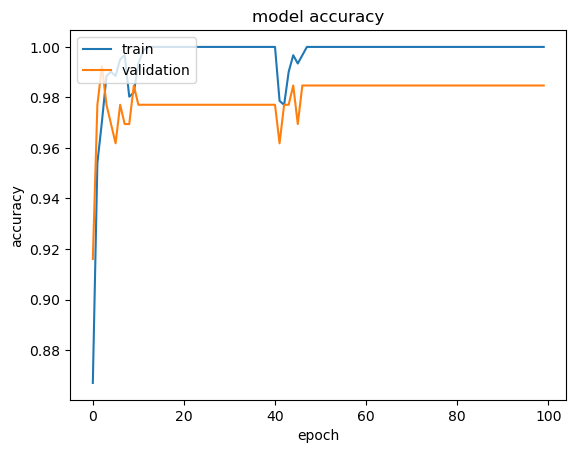

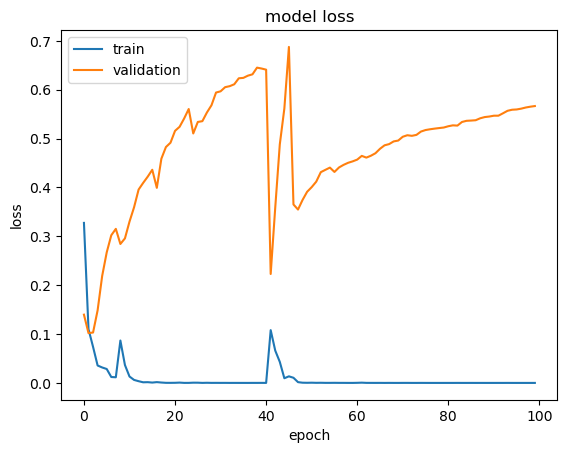

In [42]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
model4 = Sequential()
model4.add(Conv1D(64, 2, input_shape=(64, 12)))
model4.add(Activation('relu'))
model4.add(Conv1D(64, 2))
model4.add(Activation('relu'))
model4.add(MaxPooling1D(3))
model4.add(Conv1D(128, 2))
model4.add(Activation('relu'))
model4.add(Conv1D(128, 2))
model4.add(Activation('relu'))
model4.add(GlobalAveragePooling1D())
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.add(Activation('sigmoid'))

In [44]:
model4.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

/Users/pkesh/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [45]:
history = model4.fit(train_x, train_y, epochs=100, validation_data=(validation_x,validation_y),batch_size=10, shuffle=False,verbose=2)

Epoch 1/100
61/61 - 1s - loss: 0.3503 - accuracy: 0.8325 - val_loss: 0.1432 - val_accuracy: 0.9618 - 1s/epoch - 17ms/step
Epoch 2/100
61/61 - 0s - loss: 0.1603 - accuracy: 0.9327 - val_loss: 0.1315 - val_accuracy: 0.9695 - 466ms/epoch - 8ms/step
Epoch 3/100
61/61 - 0s - loss: 0.1300 - accuracy: 0.9442 - val_loss: 0.1382 - val_accuracy: 0.9695 - 430ms/epoch - 7ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0999 - accuracy: 0.9540 - val_loss: 0.1443 - val_accuracy: 0.9771 - 439ms/epoch - 7ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0818 - accuracy: 0.9688 - val_loss: 0.1389 - val_accuracy: 0.9771 - 437ms/epoch - 7ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0774 - accuracy: 0.9737 - val_loss: 0.1486 - val_accuracy: 0.9771 - 445ms/epoch - 7ms/step
Epoch 7/100
61/61 - 1s - loss: 0.0565 - accuracy: 0.9754 - val_loss: 0.1579 - val_accuracy: 0.9771 - 521ms/epoch - 9ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0513 - accuracy: 0.9803 - val_loss: 0.1631 - val_accuracy: 0.9771 - 489ms/epoch - 8ms/step
Epoch 9/10

Epoch 66/100
61/61 - 1s - loss: 3.7438e-04 - accuracy: 1.0000 - val_loss: 0.4399 - val_accuracy: 0.9618 - 530ms/epoch - 9ms/step
Epoch 67/100
61/61 - 0s - loss: 6.3202e-04 - accuracy: 1.0000 - val_loss: 0.4536 - val_accuracy: 0.9618 - 495ms/epoch - 8ms/step
Epoch 68/100
61/61 - 0s - loss: 4.5010e-04 - accuracy: 1.0000 - val_loss: 0.4515 - val_accuracy: 0.9618 - 494ms/epoch - 8ms/step
Epoch 69/100
61/61 - 0s - loss: 5.8559e-04 - accuracy: 1.0000 - val_loss: 0.4202 - val_accuracy: 0.9618 - 463ms/epoch - 8ms/step
Epoch 70/100
61/61 - 1s - loss: 1.3530e-04 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.9618 - 508ms/epoch - 8ms/step
Epoch 71/100
61/61 - 0s - loss: 1.4693e-04 - accuracy: 1.0000 - val_loss: 0.4331 - val_accuracy: 0.9618 - 474ms/epoch - 8ms/step
Epoch 72/100
61/61 - 0s - loss: 2.9746e-04 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9618 - 483ms/epoch - 8ms/step
Epoch 73/100
61/61 - 0s - loss: 2.1024e-04 - accuracy: 1.0000 - val_loss: 0.4363 - val_accuracy: 

In [46]:
model4.evaluate(validation_x,validation_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.9618


[0.4642683267593384, 0.9618320465087891]

In [47]:
model4.evaluate(test_x,test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.9466


[0.4937548339366913, 0.9465649127960205]

In [48]:
model4.evaluate(train_x,train_y)

20/20 [==============================] - 0s 5ms/step - loss: 1.4413e-05 - accuracy: 1.0000


[1.4413415556191467e-05, 1.0]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


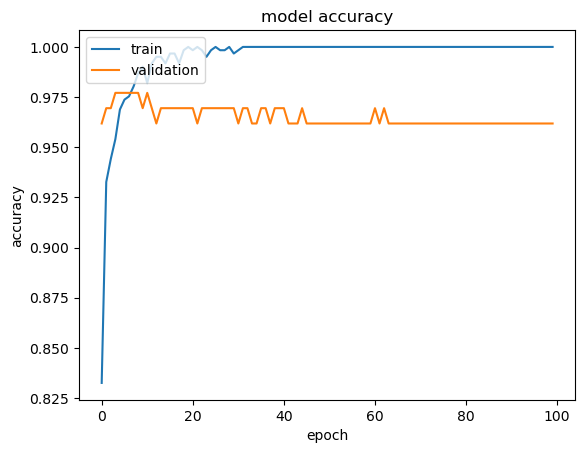

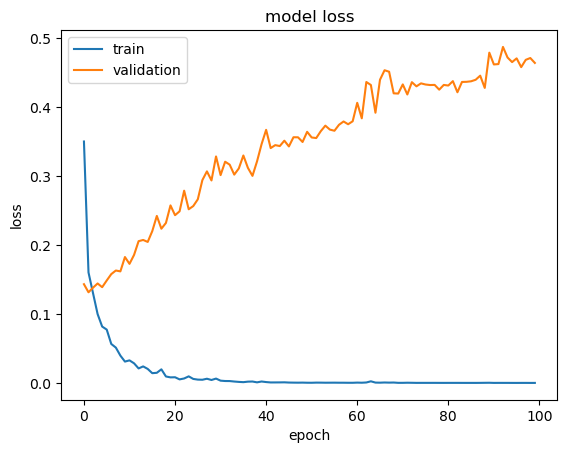

In [49]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [51]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    # Precision matrix
    B = (C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = ['non-babycry(0)','babycry(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    plt.show()

In [54]:
y = model2.predict(X_test)

5/5 [==============================] - 0s 2ms/step


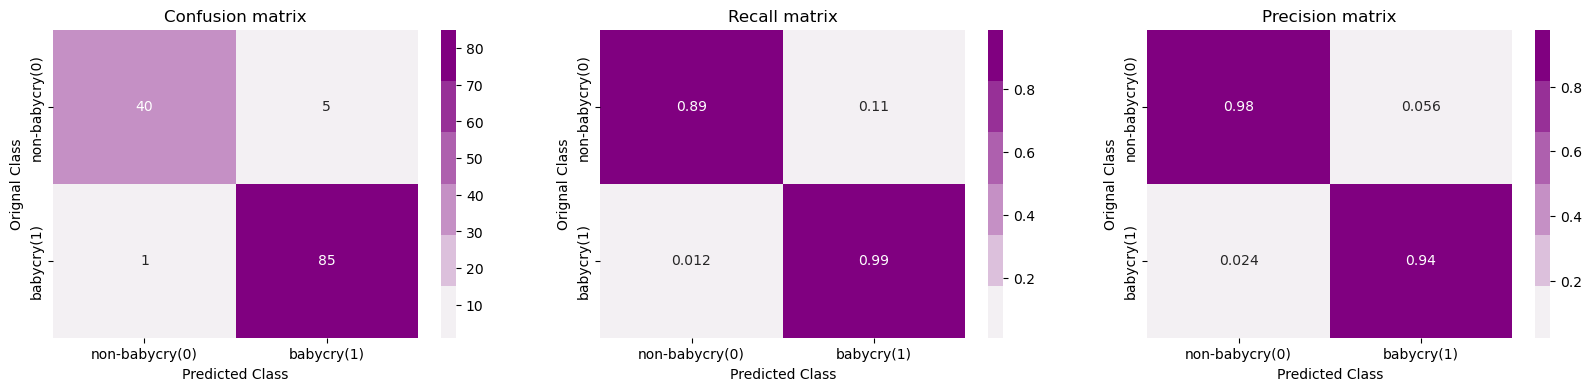

In [55]:
plot_confusion_matrix(y_test, y.round())

In [67]:
import numpy as np

# Assuming you have a list called file_names that stores the file names in the same order as X_test and y_test

# Get the predicted values as 0s or 1s
y_pred = y.round()

# Find the indices where the predicted values differ from the true labels
diff_indices = np.where(y_pred != y_test)[0]

# Find the indices where the predicted values match the true labels
match_indices = np.where(y_pred == y_test)[0]

# Print the file names corresponding to the correct predictions
correct_files = [baby_cry[i] for i in match_indices]
print("\nCorrectly predicted files:")
for file_name in correct_files:
    print(file_name)
    
    
# # Print the file names corresponding to the incorrect predictions
# incorrect_files = [baby_cry[i] for i in diff_indices]
# print("Incorrectly predicted files:")
# for file_name in incorrect_files:
#     print(file_name)
    




Correctly predicted files:
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav
/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf

In [58]:
baby_cry

['/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/c10e2b0f-0cb8-4485-b82f-d453edf97db7-1430738986076-1.7-f-26-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/8c66887c-8251-49fa-903b-c02d56405f58-1436856065644-1.7-m-26-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/0f257dac-7d6f-4575-9192-e3b4dcd3d4ef-1430185441581-1.7-f-26-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/2602b7c2-e96d-42f6-9767-f1ae74925ef8-1431376228657-1.7-f-22-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/81724071-bc5e-4e38-8f35-85a691af5721-1430737552979-1.7-m-04-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/9CFD61B9-BF13-406D-8B2F-F73CFAAF25CB-1430927728-1.0-f-04-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/adcefe56-90b1-4120-83b1-93008cb6f7f0-1430731683554-1.7-m-04-hu.wav',
 '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/afa44e7f-4187-4f1c-9437-b49ba75f

In [229]:
with open('cnn.json','w') as f:
    f.write(model2.to_json())

In [230]:
model2.save_weights("cnn.h5")

In [226]:
model1.save('my_cnn.h5')

In [77]:
filename = '/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318400-1.0-m-04-hu.wav'

# # Using previously above created feature extractor 
# prediction_feature=Mfcc(filename)
# prediction_feature=prediction_feature.reshape(1,-1)
# model2.predict(prediction_feature)
# #model.predict_classes(prediction_feature) # Depricated in new version of Tensorflow
# predictions = np.argmax(model.predict(prediction_feature),axis=1)
# print(predictions)



prediction_feature = Mfcc(filename)
prediction_feature = prediction_feature.reshape(1, 64, 12)  # reshape to match expected input shape
probs = model2.predict(prediction_feature)
predictions = np.argmax(probs, axis=1)
print(predictions)



1/1 [==============================] - 0s 14ms/step
[0]


In [242]:
print('Shape of filename:',filename.shape)

AttributeError: 'str' object has no attribute 'shape'

In [76]:
# Create a test dataset with only baby cry files
baby_cry_test_files = baby_cry[len(baby_cry) - len(X_test):]
baby_cry_test_data = np.zeros((len(baby_cry_test_files), 64, 12))

# Extract MFCC features for baby cry test files
for i, file in enumerate(baby_cry_test_files):
    r = Mfcc(file)
    baby_cry_test_data[i, :, :] = r

# Make predictions on baby cry test dataset
predictions = model1.predict(baby_cry_test_data)
predicted_classes = [1 if p >= 0.5 else 0 for p in predictions]

# Print predicted class and file names
for i, predicted_class in enumerate(predicted_classes):
    print(f"File: {baby_cry_test_files[i]}, Predicted Class: {predicted_class}")


5/5 [==============================] - 0s 3ms/step
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318400-1.0-m-04-hu.wav, Predicted Class: 1
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/7B924575-21FC-462A-969E-BABB46D1CBF5-1430055220-1.0-f-72-hu.wav, Predicted Class: 1
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/4-59579-A-20.wav, Predicted Class: 1
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/af30880e-5f98-4dc0-b37a-be6b21fa0ba3-1431240072536-1.7-m-26-bu.wav, Predicted Class: 1
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/665BDF6D-2897-49F9-8AD0-978B3B2A0468-1430530218-1.0-m-26-dc.wav, Predicted Class: 1
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/Louise_01.m4a_11.wav, Predicted Class: 1
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/cde108d0-62c3-47f8-82c4-233c9fba5cdd-1436884444242-1.7-m-48-hu.wav, Predicted

In [83]:
def predict_single_file(file, model):
    # Extract MFCC features
    mfcc_features = Mfcc(file)

    # Reshape the MFCC features to match the input shape of the model
    mfcc_features = np.expand_dims(mfcc_features, axis=0)

    # Make a prediction using the model
    prediction = model1.predict(mfcc_features)

    # Convert the prediction to class label
    predicted_class = 1 if prediction >= 0.5 else 0

    return predicted_class

# Test the function with a single file
file = "/Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318400-1.0-m-04-hu.wav"
predicted_class = predict_single_file(file, model1)

print(f"File: {file}, Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 13ms/step
File: /Users/pkesh/projects/Exp-Research-POC/input_data/baby-cry/F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318400-1.0-m-04-hu.wav, Predicted Class: 1
